# Auto Insurance Analysis

## Exploratory Data Analysis

## Project Goal

## Summary of Data

### Library Import

In [1]:
#Import libraries
%run ../python_files/imports

## Data Import and Data Exploration

In [2]:
# import auto insurance data

# change values with empty spaces in the dataset to NaN values
auto_insurance_df = pd.read_csv('../data/auto_insurance_data.csv')

# change column names to lower-case
auto_insurance_df.columns = [i.lower() for i in auto_insurance_df.columns]

# quick overview of the dataset
auto_insurance_df.head()

,crash,crash_cost,kidsdriv,age,homekids,yoj,income,parent1,home_val,mstatus,...,bluebook,tif,car_type,red_car,oldclaim,clm_freq,revoked,mvr_pts,car_age,urbanicity
0,0,0.0,0,60,0,11,67349.38162,No,0.0000,No,...,14230,11,Minivan,yes,4461,2,No,3,18,Highly Urban/ Urban
1,0,0.0,0,43,0,11,91449.25464,No,257251.6354,No,...,14940,1,Minivan,yes,0,0,No,0,1,Highly Urban/ Urban
2,0,0.0,0,35,1,10,16038.58710,No,124190.7529,Yes,...,4010,4,SUV,no,38690,2,No,3,10,Highly Urban/ Urban
3,1,2946.0,0,34,1,12,125301.24250,Yes,0.0000,No,...,17430,1,Sports Car,no,0,0,No,0,7,Highly Urban/ Urban
4,1,2501.0,0,34,0,10,62977.82416,No,0.0000,No,...,11200,1,SUV,no,0,0,No,0,1,Highly Urban/ Urban


After a quick overview of the dataset, we see that we are working with 6043 total observations and 25 different variables. The response variable we will be using is Crash, which indicates whether a car was in a crash or not. The remaining 24 variables will be used as explanatory variables. We also notice a good mix of continuous and categorical variables.

In [3]:
# quick review of the variables in the dataset
auto_insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044 entries, 0 to 6043
Data columns (total 25 columns):
crash         6044 non-null int64
crash_cost    6044 non-null float64
kidsdriv      6044 non-null int64
age           6044 non-null int64
homekids      6044 non-null int64
yoj           6044 non-null int64
income        6044 non-null float64
parent1       6044 non-null object
home_val      6044 non-null float64
mstatus       6044 non-null object
sex           6044 non-null object
education     6044 non-null object
job           6044 non-null object
travtime      6044 non-null float64
car_use       6044 non-null object
bluebook      6044 non-null int64
tif           6044 non-null int64
car_type      6044 non-null object
red_car       6044 non-null object
oldclaim      6044 non-null int64
clm_freq      6044 non-null int64
revoked       6044 non-null object
mvr_pts       6044 non-null int64
car_age       6044 non-null int64
urbanicity    6044 non-null object
dtypes: float64(4), int64

For modeling purposes, we know that we will have to convert all categorical variables to dummy variables. As we can see above, there are 10 categorical variables that will need to go through this conversion.

In [4]:
# quick review of the characteristics of our current continuous variables in the dataset
auto_insurance_df.describe()

,crash,crash_cost,kidsdriv,age,homekids,yoj,income,home_val,travtime,bluebook,tif,oldclaim,clm_freq,mvr_pts,car_age
count,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000
mean,0.264891,1479.664479,0.173230,44.628061,0.743547,10.494375,58178.583187,150091.831763,33.695527,15235.584050,5.360523,3999.992058,0.783752,1.699868,7.922733
std,0.441312,4553.548768,0.515462,8.708472,1.132793,4.138805,43830.436426,123736.396505,15.889558,8041.627756,4.144970,8815.064402,1.153627,2.158059,5.582574
min,0.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,39.000000,0.000000,9.000000,26745.589935,0.000000,22.800199,9170.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,45.000000,0.000000,11.000000,51624.202055,159147.432550,33.016349,14080.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,1.000000,1036.250000,0.000000,51.000000,1.000000,13.000000,81289.165560,233060.839575,43.945989,20120.000000,7.000000,4540.000000,2.000000,3.000000,12.000000
max,1.000000,85523.653350,4.000000,81.000000,5.000000,23.000000,367030.262000,885282.345000,142.120630,65970.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


We notice above that there is a large range between some of our observations. However, it is not appropriate to dismiss these as outliers, as we do not want to skew or create bias within our dataset. Also, above we cannot view the descriptions of our 10 categorical variables until we convert them to continous variables.

In [5]:
# check the number of NaN values in the dataset
auto_insurance_df.isna().sum()

crash         0
crash_cost    0
kidsdriv      0
age           0
homekids      0
yoj           0
income        0
parent1       0
home_val      0
mstatus       0
sex           0
education     0
job           0
travtime      0
car_use       0
bluebook      0
tif           0
car_type      0
red_car       0
oldclaim      0
clm_freq      0
revoked       0
mvr_pts       0
car_age       0
urbanicity    0
dtype: int64

Fortunately, we see above that our dataset does not contain any missing values, so we will not need to worry about imputation.

## Data Cleaning and Data Transformations

In [1]:
# Create dummy values for the categorical variables



In [3]:
# Log Transformations



## Train and Test Dataset Creation

In [ ]:
#Split auto_insurance_df into train and test datasets
crash = auto_insurance_df['crash']
features = auto_insurance_df.drop(['crash', 'crash_cost'], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(features, crash, test_size = 0.2, random_state = 10)

## Initial Findings

In [8]:
# Correlations
auto_insurance_df.corr(method = 'pearson')

,kidsdriv,age,homekids,yoj,income,home_val,mstatus,travtime,bluebook,tif,...,urban_high_1hot,female,single_parent,car_type_cat,job_cat,log_income,log_home_val,log_car_age,log_tif,log_travtime
kidsdriv,1.000000,-0.063364,0.451814,0.052355,-0.037662,-0.017041,0.044507,0.006435,-0.003084,-0.007567,...,-0.041156,NaN,0.186169,-0.001992,-0.041068,-0.030421,-0.028842,-0.052127,-0.021094,-0.000520
age,-0.063364,1.000000,-0.444656,0.132738,0.186302,0.213615,0.097775,0.001562,0.143708,-0.009022,...,0.054565,NaN,-0.321977,0.012606,0.073837,0.170747,0.233267,0.156107,-0.009437,0.002413
homekids,0.451814,-0.444656,1.000000,0.098026,-0.145450,-0.105395,0.044290,-0.010233,-0.083472,0.002154,...,-0.059459,NaN,0.452801,0.040776,-0.066984,-0.129669,-0.141428,-0.135073,-0.005668,-0.021134
yoj,0.052355,0.132738,0.098026,1.000000,0.299695,0.265340,0.127025,-0.034313,0.146448,0.031436,...,0.086742,NaN,-0.041845,-0.054205,-0.188571,-0.051463,0.278930,0.048370,0.029664,-0.037553
income,-0.037662,0.186302,-0.145450,0.299695,1.000000,0.584057,-0.016065,-0.057494,0.393978,0.006241,...,0.216395,NaN,-0.064002,-0.070105,0.052742,0.721425,0.738338,0.328006,-0.000868,-0.044934
home_val,-0.017041,0.213615,-0.105395,0.265340,0.584057,1.000000,0.468005,-0.037857,0.248141,-0.006005,...,0.109349,NaN,-0.255503,-0.044201,-0.036858,0.436119,0.809510,0.171218,-0.008658,-0.034292
mstatus,0.044507,0.097775,0.044290,0.127025,-0.016065,0.468005,1.000000,0.013750,0.015260,-0.006001,...,-0.012740,NaN,-0.481775,0.016217,-0.012048,-0.004693,0.195574,-0.021889,-0.004766,0.011567
travtime,0.006435,0.001562,-0.010233,-0.034313,-0.057494,-0.037857,0.013750,1.000000,-0.026569,-0.014641,...,-0.157708,NaN,-0.016936,0.009523,-0.033672,-0.049572,-0.049150,-0.016634,-0.014343,0.927631
bluebook,-0.003084,0.143708,-0.083472,0.146448,0.393978,0.248141,0.015260,-0.026569,1.000000,0.001954,...,0.093679,NaN,-0.044547,-0.128154,0.037221,0.288516,0.302179,0.121118,-0.002772,-0.019326
tif,-0.007567,-0.009022,0.002154,0.031436,0.006241,-0.006005,-0.006001,-0.014641,0.001954,1.000000,...,0.013172,NaN,-0.011317,0.018655,-0.006104,0.000097,-0.009572,-0.006474,0.921632,-0.027942


In [10]:
mask = np.zeros_like(x_train.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1

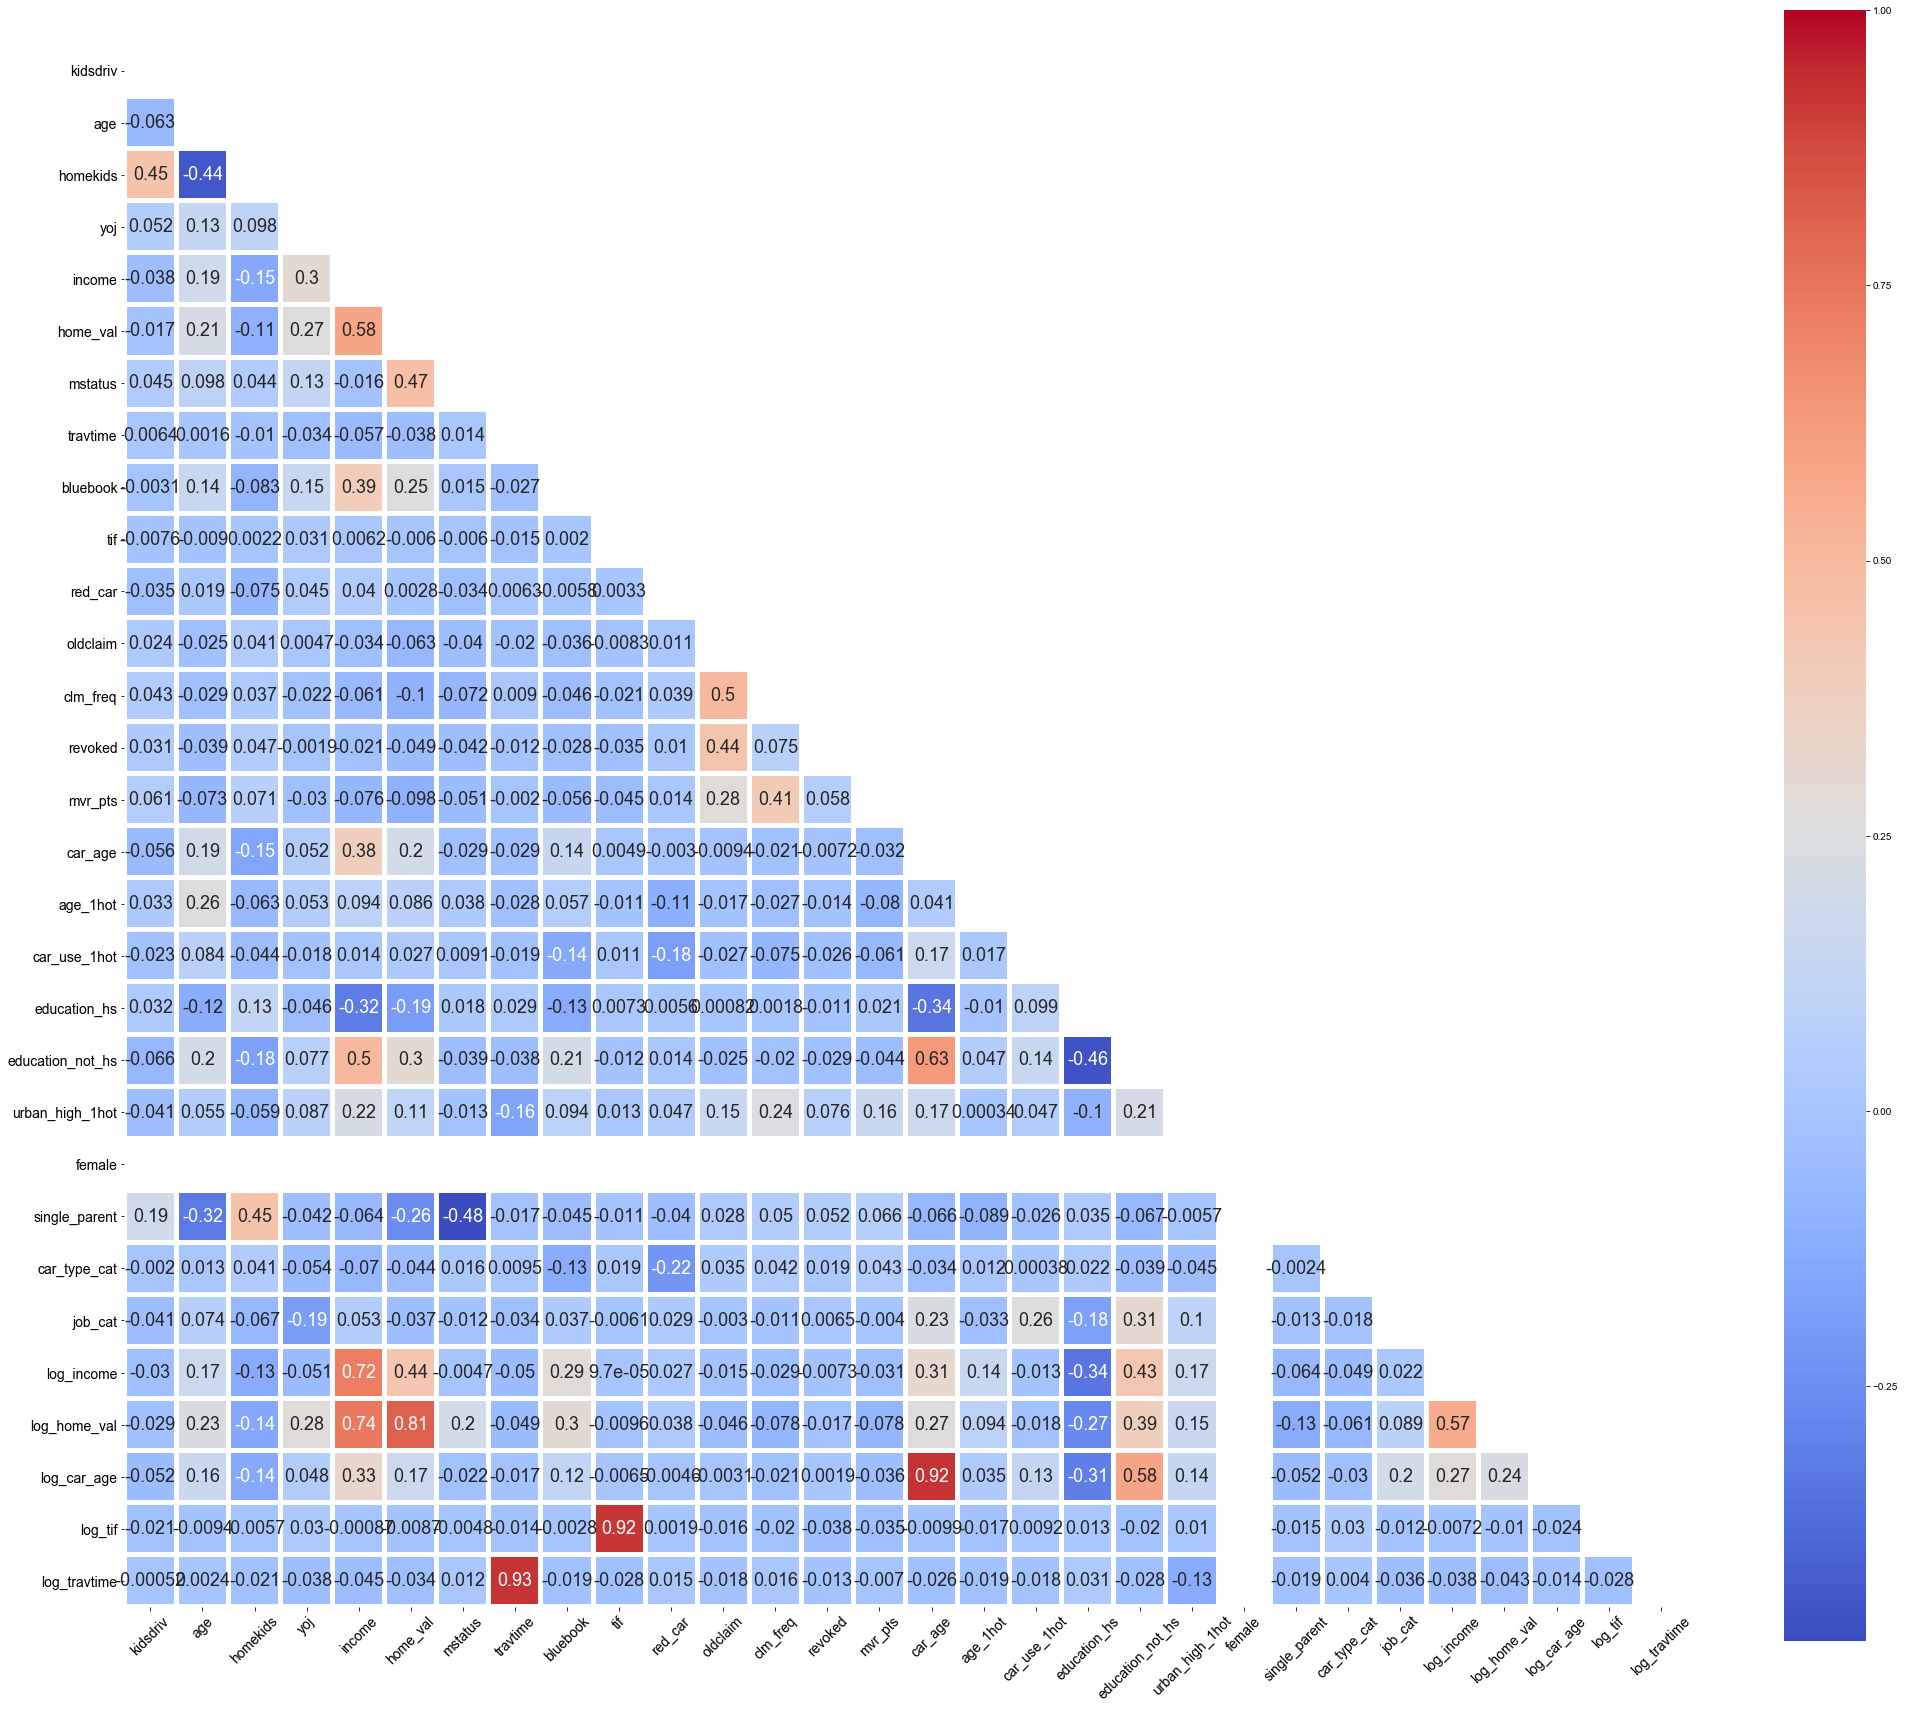

In [11]:
#Correlation Heatmap

plt.figure(figsize=(35,30))
ax = sns.heatmap(x_train.corr(method='pearson'), cmap="coolwarm", mask=mask, annot=True, annot_kws={"size": 18}, square=True, linewidths=4)
sns.set_style('white')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14, rotation=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#plt.ylabel(ylabel=' ', labelpad=100)
plt.show()

In [ ]:
%%time

sns.pairplot(auto_insurance_df)
plt.show()